In [1]:
import pandas as pd
import numpy as np

In [2]:
import importlib

In [107]:
import pickle

In [3]:
!pip install ipynb

You should consider upgrading via the 'C:\Users\ПК\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme(style="whitegrid")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import xgboost

In [8]:
import catboost

In [9]:
from ipynb.fs.full import process_functions as func

In [10]:
importlib.reload(func)

<module 'ipynb.fs.full.process_functions' (D:\Learning\GeekBrains\_Final Project\process_functions.ipynb)>

In [11]:
df_macro = pd.read_pickle('macroeconomic.pkl')

In [12]:
df = pd.read_csv('project_data/attempt_4/train.csv')

In [13]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [14]:
df.shape

(30471, 292)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [16]:
empty_fields = df.isna().sum()
empty_fields

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [17]:
empty_fields = pd.DataFrame(empty_fields, columns=['number'])
empty_fields.head()

,number
id,0
timestamp,0
full_sq,0
life_sq,6383
floor,167


In [18]:
empty_fields = empty_fields[empty_fields['number']>0]
empty_fields.shape

(51, 1)

In [19]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [20]:
dataset_columns = df.columns

разобъем датасет на категориальные и цифровые признаки

In [21]:
cat_features = df.select_dtypes(include=['object']).columns

In [22]:
cat_features

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [23]:
df_cat = df[['id', *cat_features.to_list()]]

In [24]:
df_cat.head()

,id,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,1,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,3,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,4,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,5,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


In [25]:
num_features =  df.select_dtypes(exclude=['object']).columns

In [26]:
num_features

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)

In [27]:
df_num = df[[*num_features.to_list()]]

In [28]:
df_num.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Анализ признаков по отдельности для каждого из типов признаков.

#### Анализ числовых признаков

Параллельно с анализом признаков имеет смысл определять выбросы.  
Если соличество значений, которые являются выбросами сравнительно невелико (меньше одного процента от датасета, то имеет смысл удалять такие значения для тренировочного датасета).
По результататм анализа данных будут 

In [29]:
num_features.shape

(276,)

In [30]:
num_features[1:13]


Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'green_zone_part'],
      dtype='object')

<AxesSubplot:xlabel='green_zone_part'>

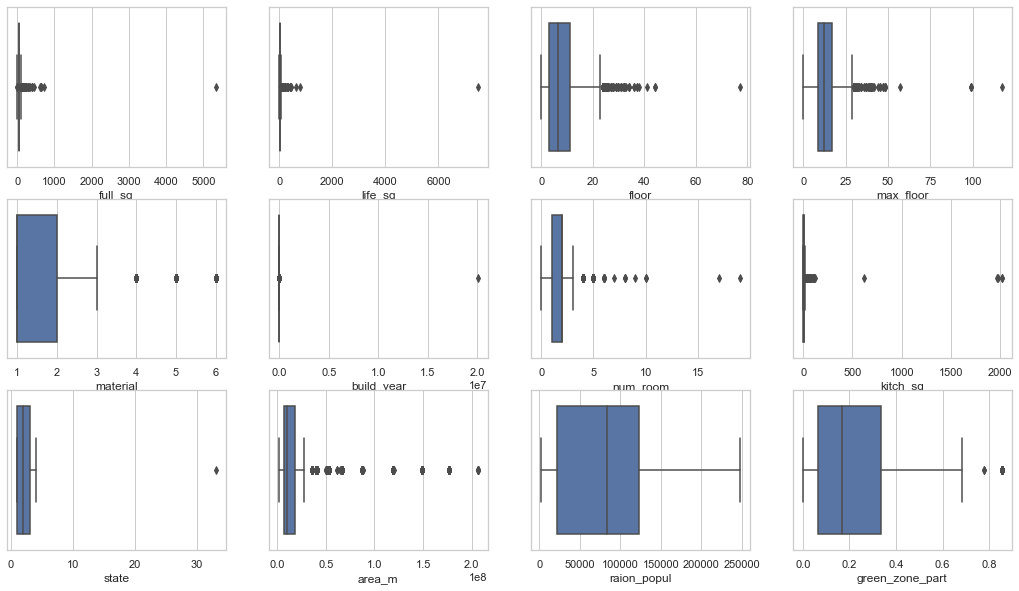

In [31]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='full_sq')   
sns.boxplot(ax=axes[0, 1], data=df, x='life_sq')
sns.boxplot(ax=axes[0, 2], data=df, x='floor')
sns.boxplot(ax=axes[0, 3], data=df, x='max_floor')
sns.boxplot(ax=axes[1, 0], data=df, x='material')
sns.boxplot(ax=axes[1, 1], data=df, x='build_year')
sns.boxplot(ax=axes[1, 2], data=df, x='num_room')
sns.boxplot(ax=axes[1, 3], data=df, x='kitch_sq')
sns.boxplot(ax=axes[2, 0], data=df, x='state')
sns.boxplot(ax=axes[2, 1], data=df, x='area_m')
sns.boxplot(ax=axes[2, 2], data=df, x='raion_popul')
sns.boxplot(ax=axes[2, 3], data=df, x='green_zone_part')

In [32]:
num_features[14:26]

Index(['children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion'],
      dtype='object')

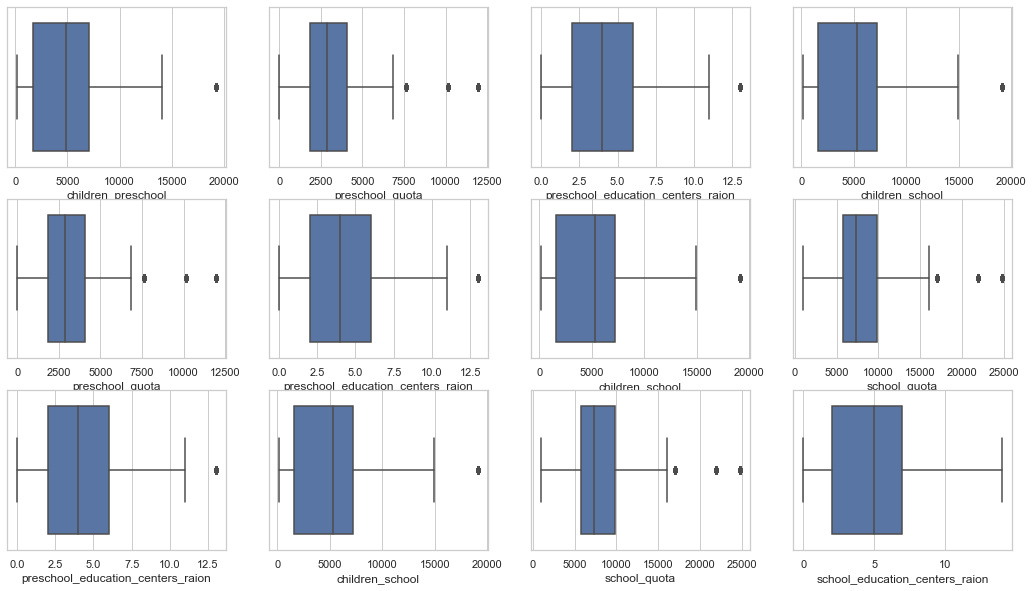

In [33]:
num_list_next = num_features[14:26]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])    

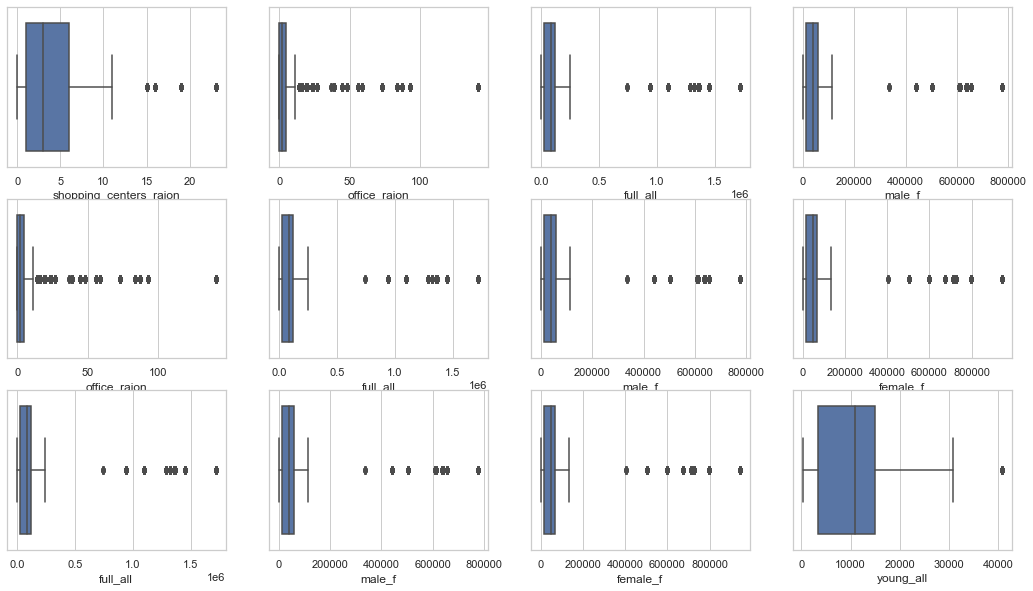

In [34]:
num_list_next = num_features[27:39]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

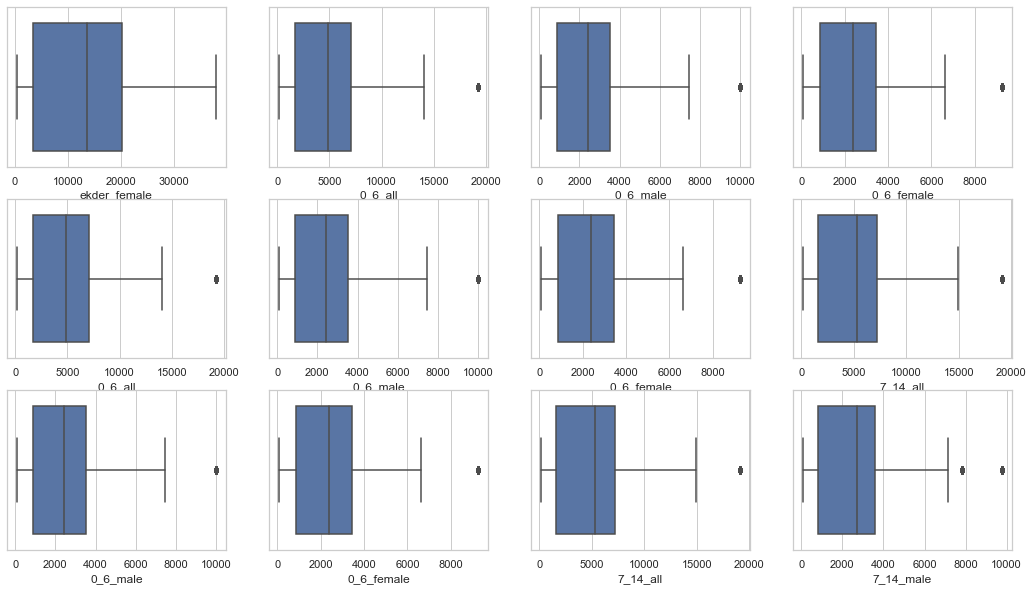

In [35]:
num_list_next = num_features[40:52]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

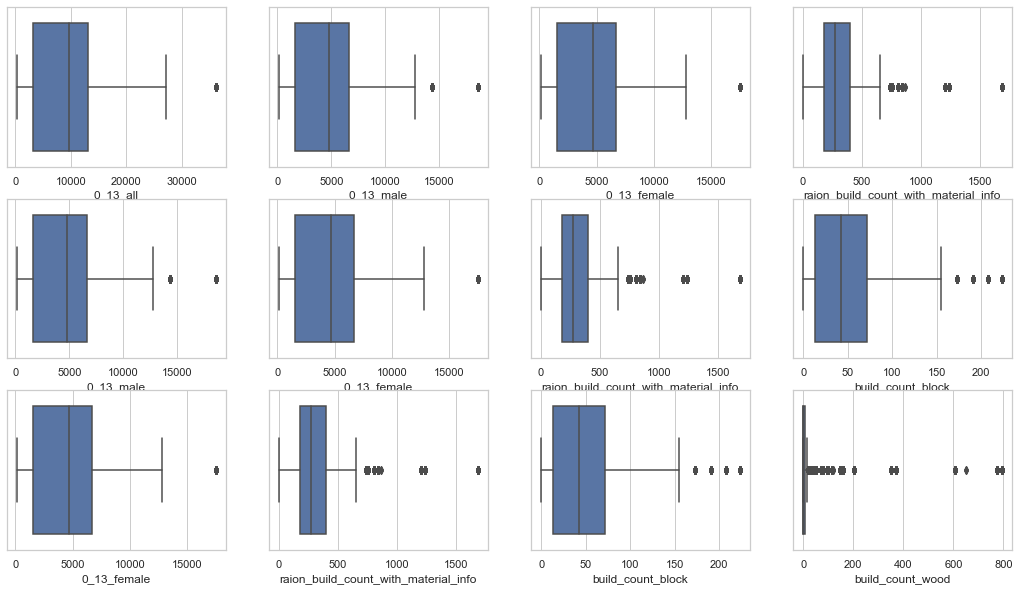

In [36]:
num_list_next = num_features[53:65]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

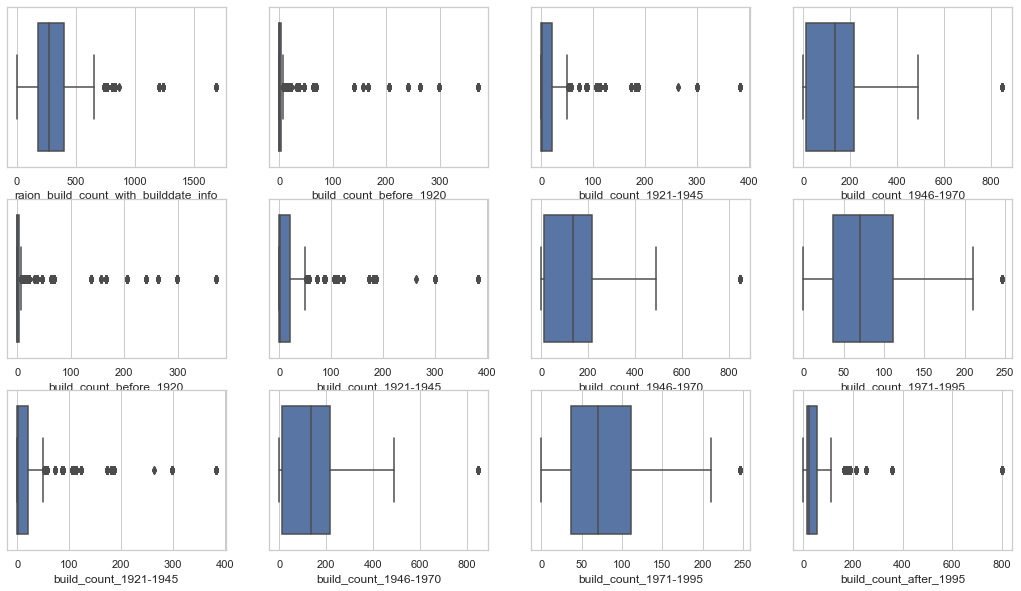

In [37]:
num_list_next = num_features[66:78]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

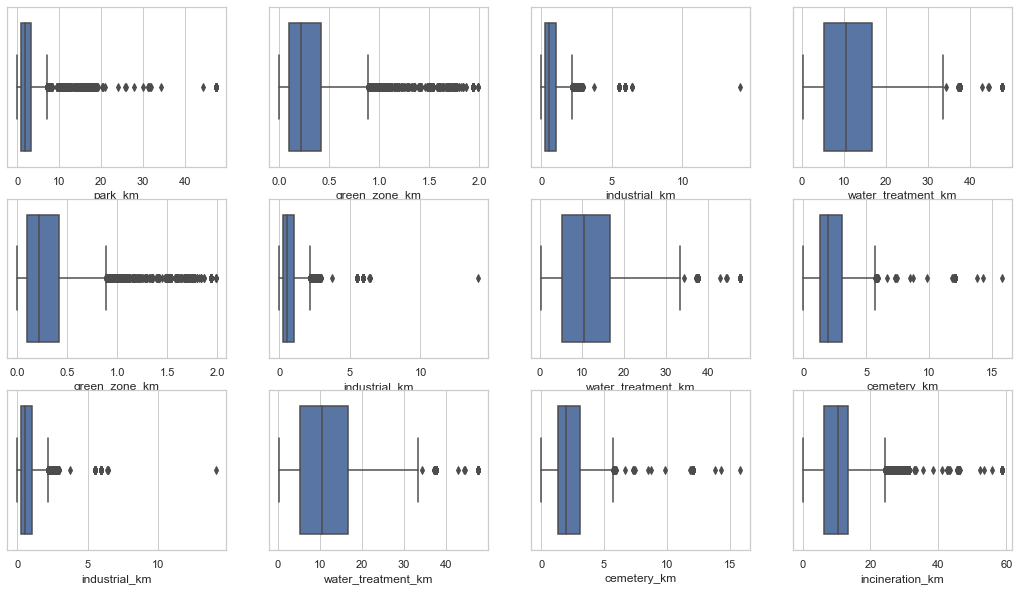

In [38]:
num_list_next = num_features[79:91]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

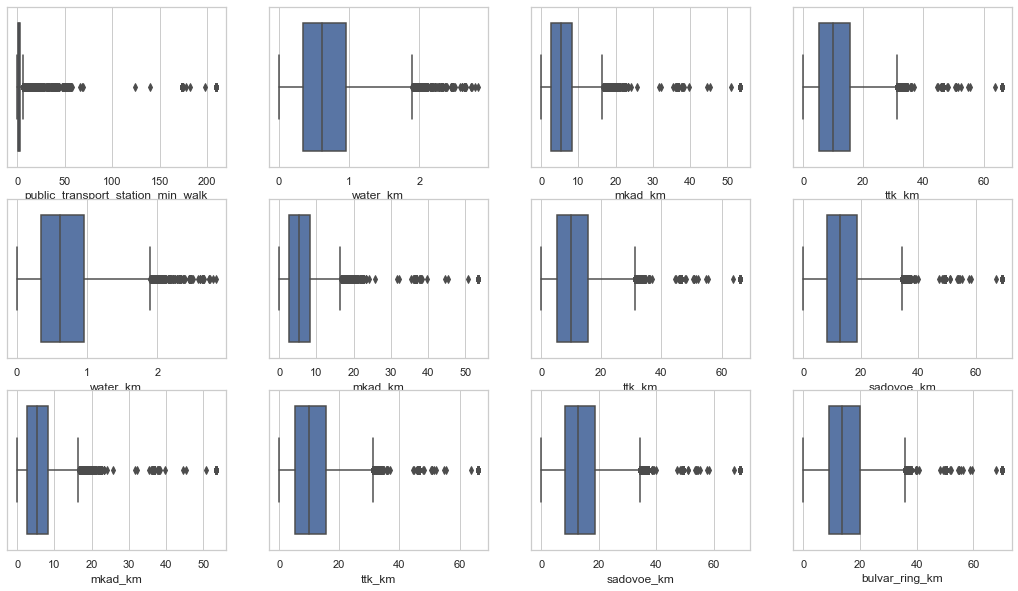

In [39]:
num_list_next = num_features[92:104]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

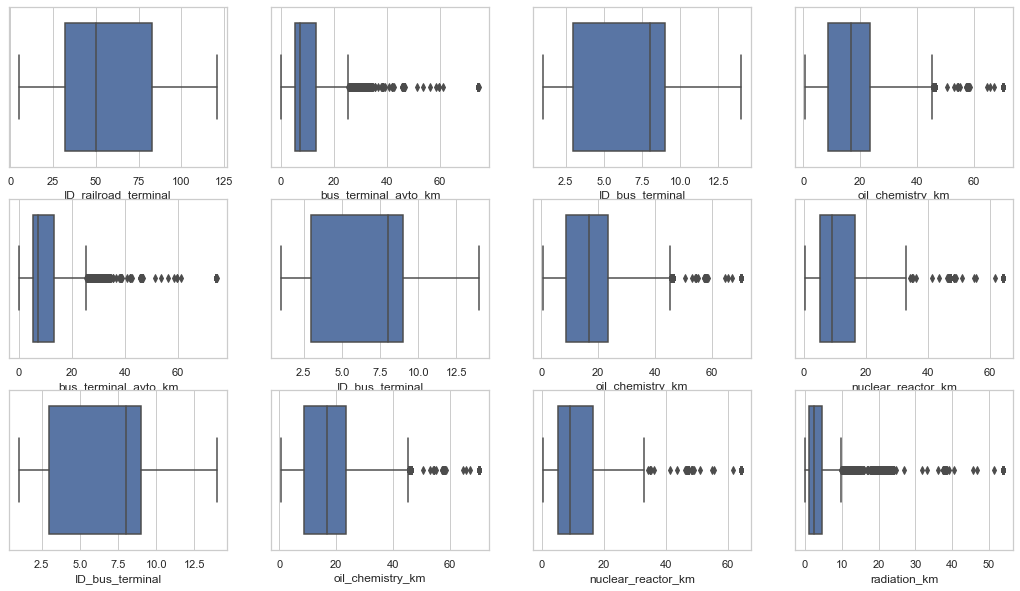

In [40]:
num_list_next = num_features[105:117]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

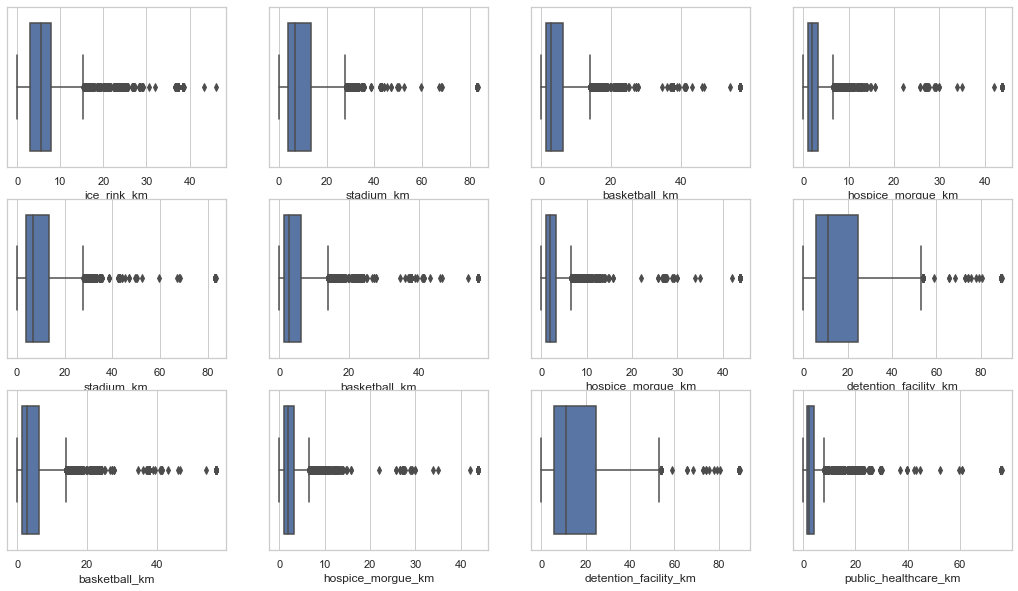

In [41]:
num_list_next = num_features[118:130]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

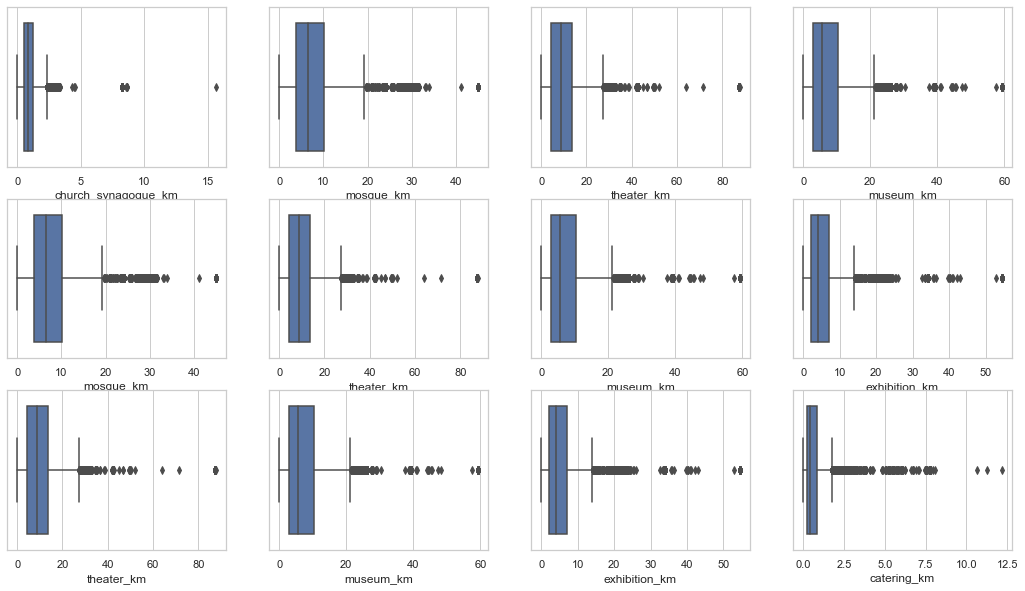

In [42]:
num_list_next = num_features[131:143]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

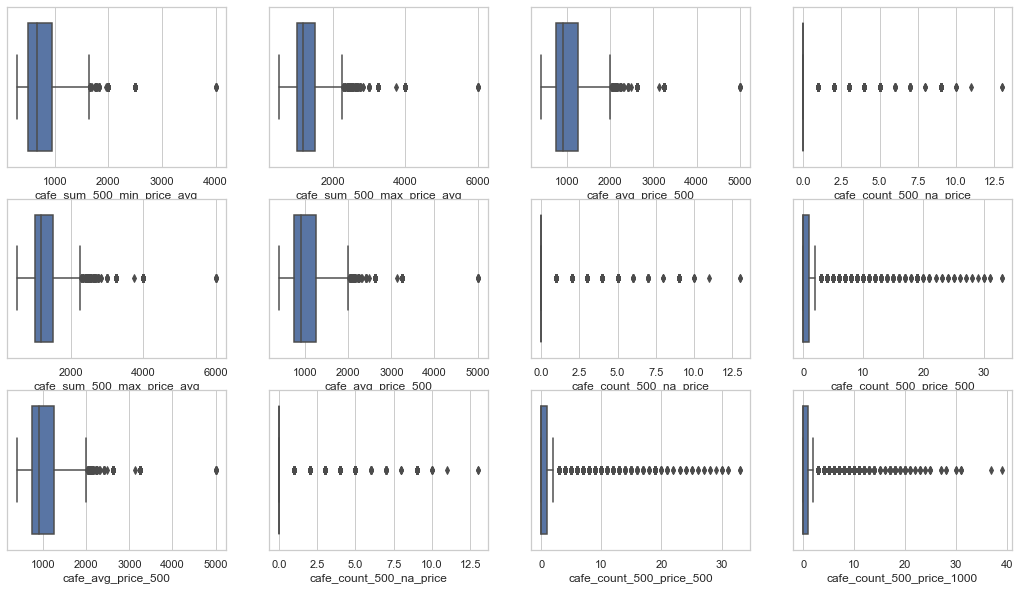

In [43]:
num_list_next = num_features[144:156]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

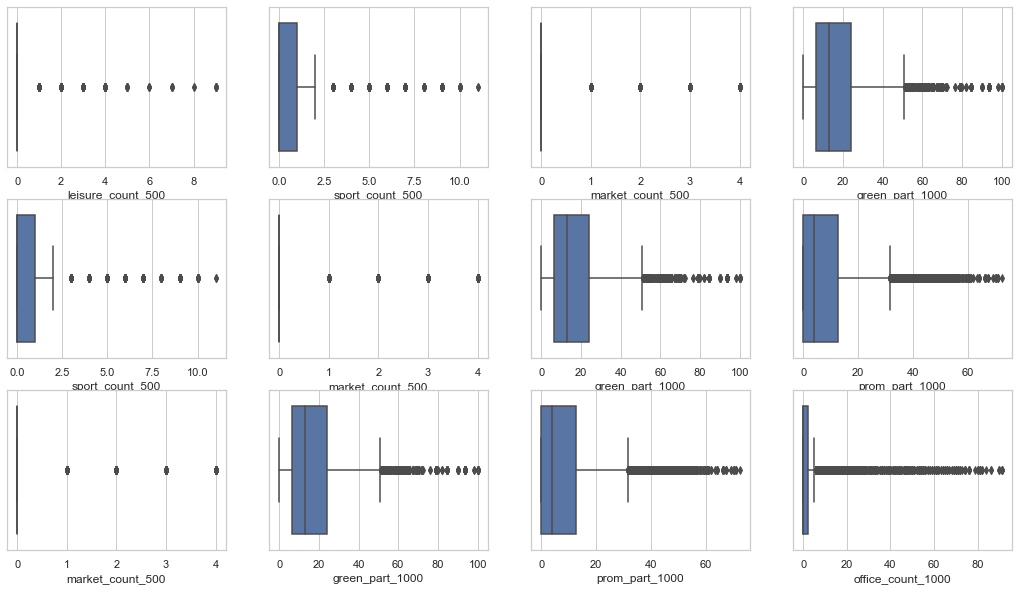

In [44]:
num_list_next = num_features[157:169]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

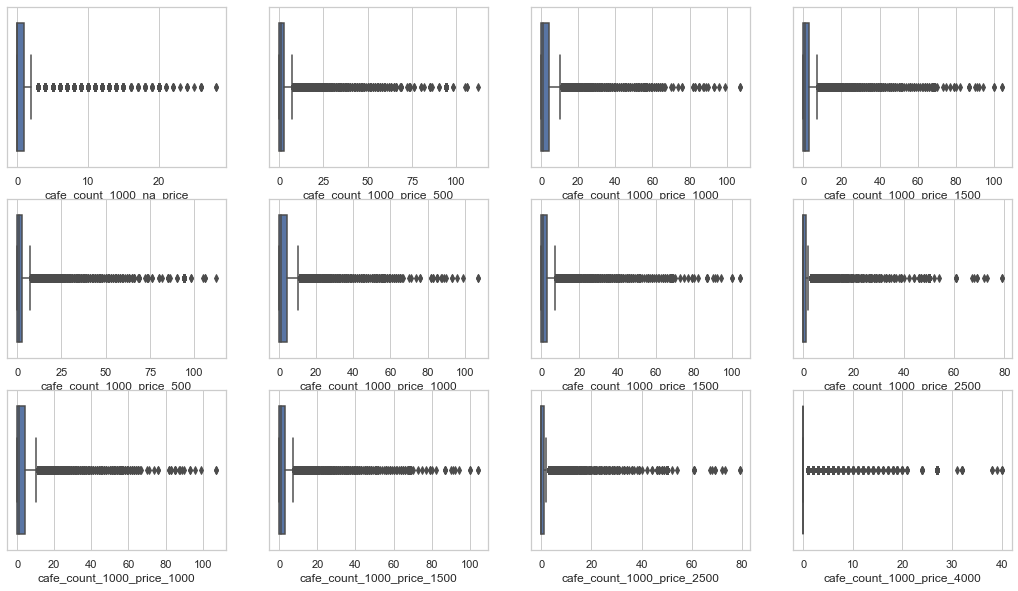

In [45]:
num_list_next = num_features[170:182]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

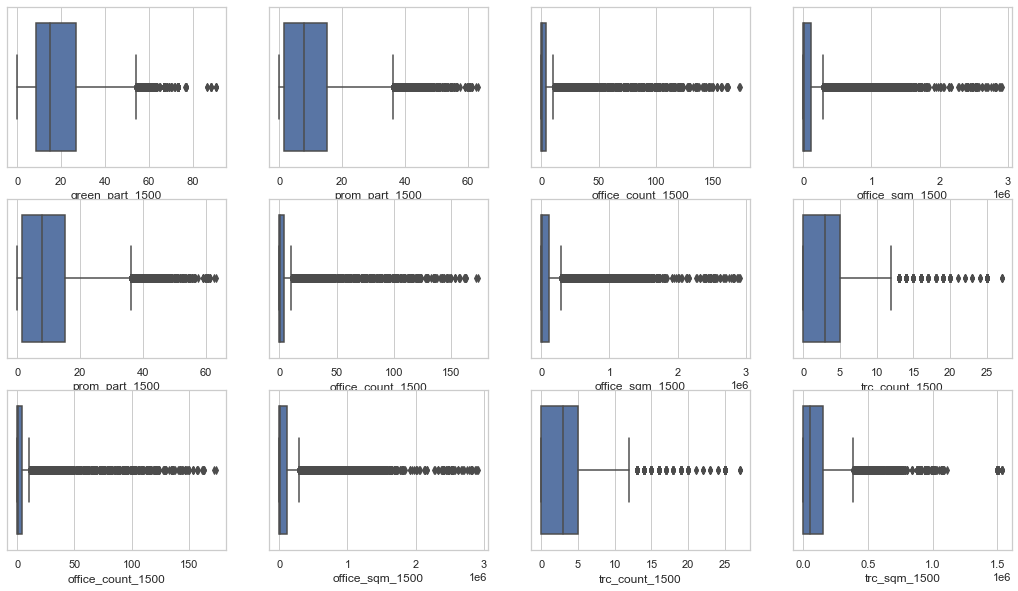

In [46]:
num_list_next = num_features[183:195]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

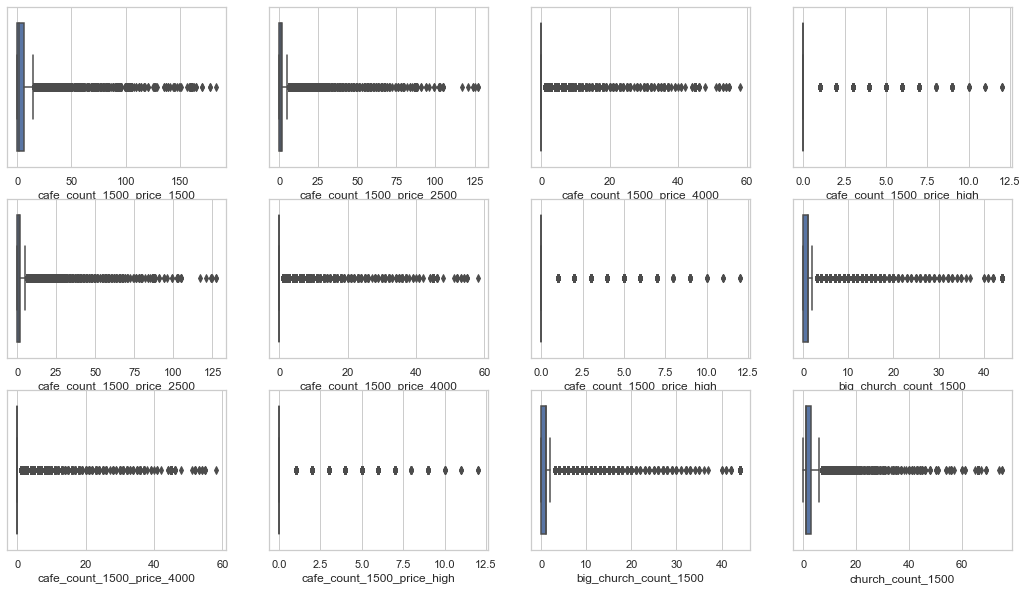

In [47]:
num_list_next = num_features[196:208]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

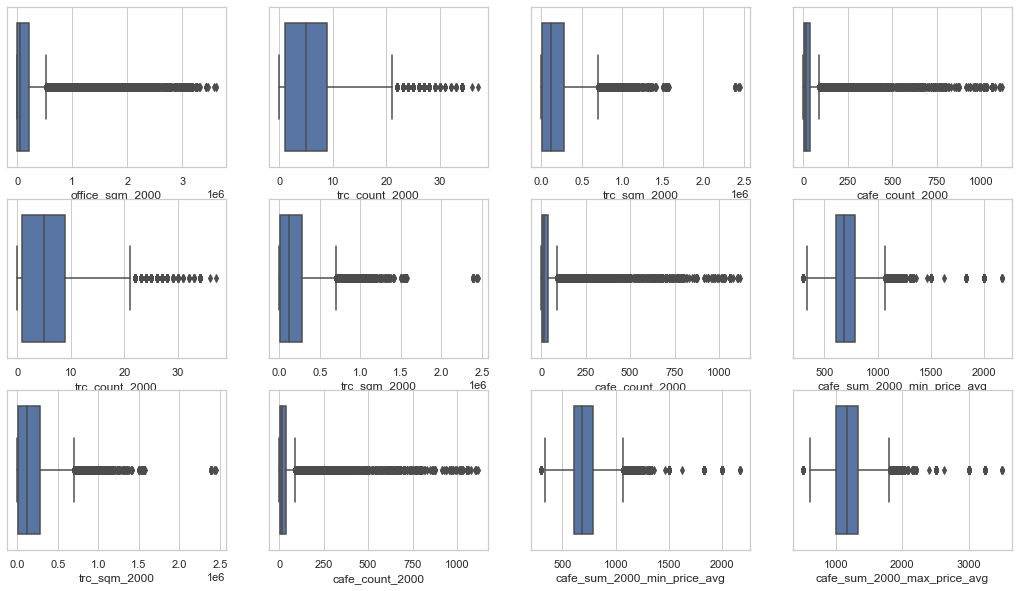

In [48]:
num_list_next = num_features[209:221]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

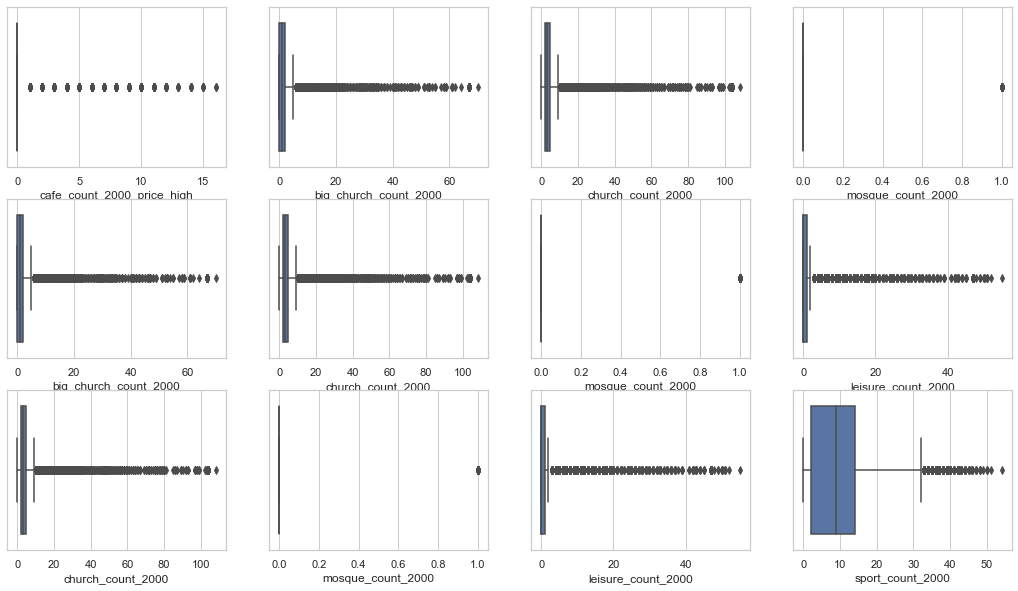

In [49]:
num_list_next = num_features[222:234]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

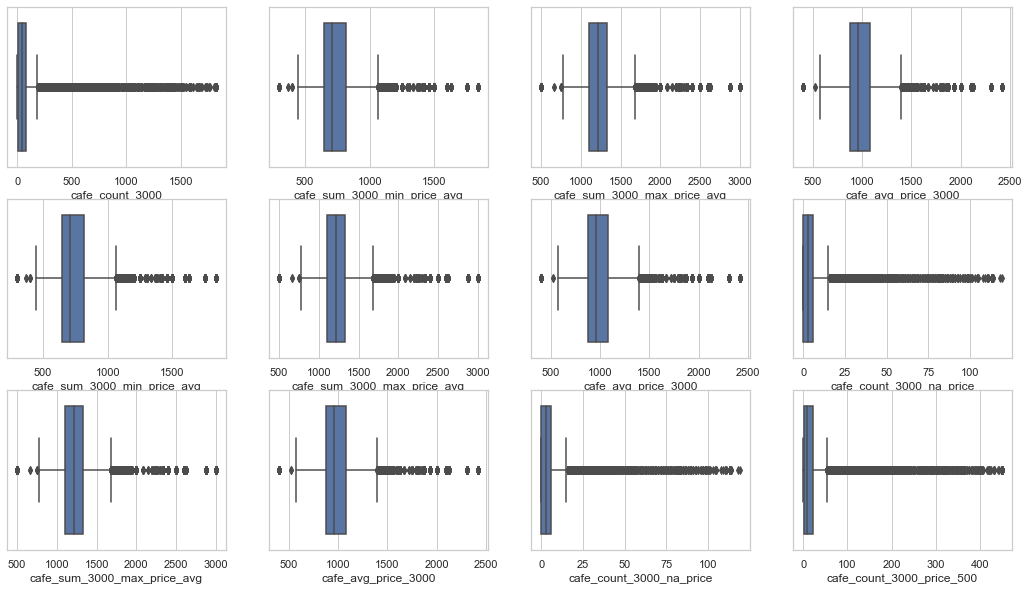

In [50]:
num_list_next = num_features[235:247]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

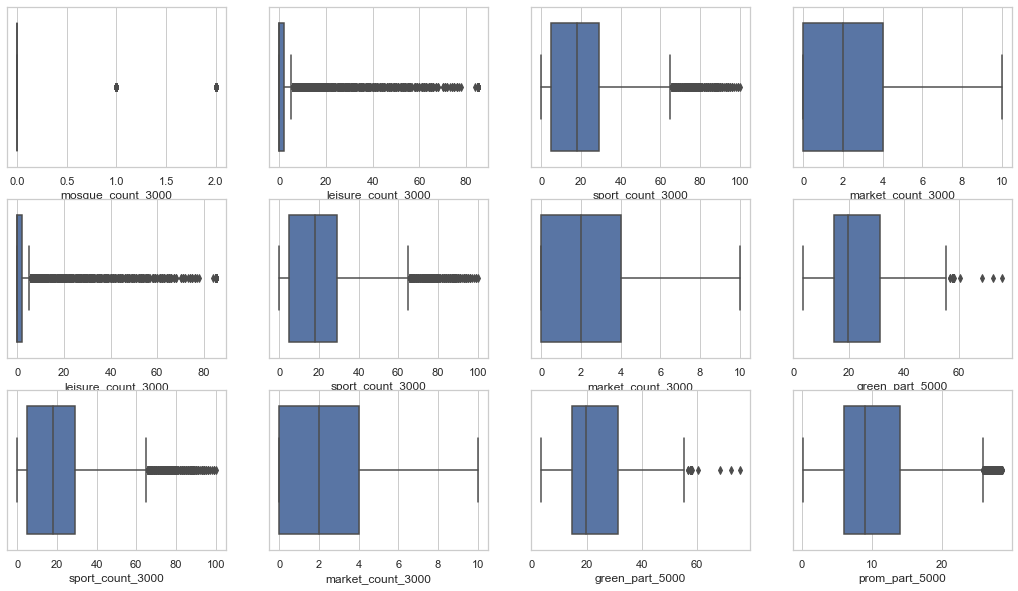

In [51]:
num_list_next = num_features[248:260]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

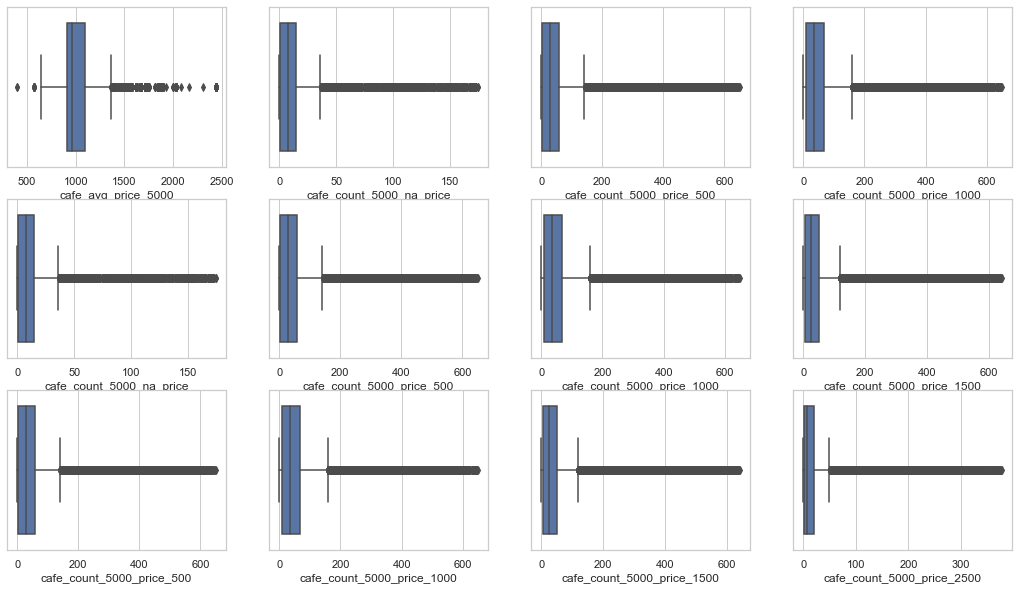

In [52]:
num_list_next = num_features[261:273]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

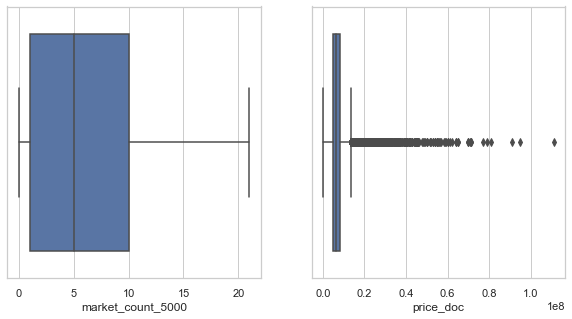

In [53]:
num_list_next = num_features[274:]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
j = 0
for i in range(len(num_list_next)):    
       sns.boxplot(ax=axes[i], data=df, x=num_list_next[i + j])

#### Первичый анализ категориальных признаков

In [54]:
len(cat_features)

16

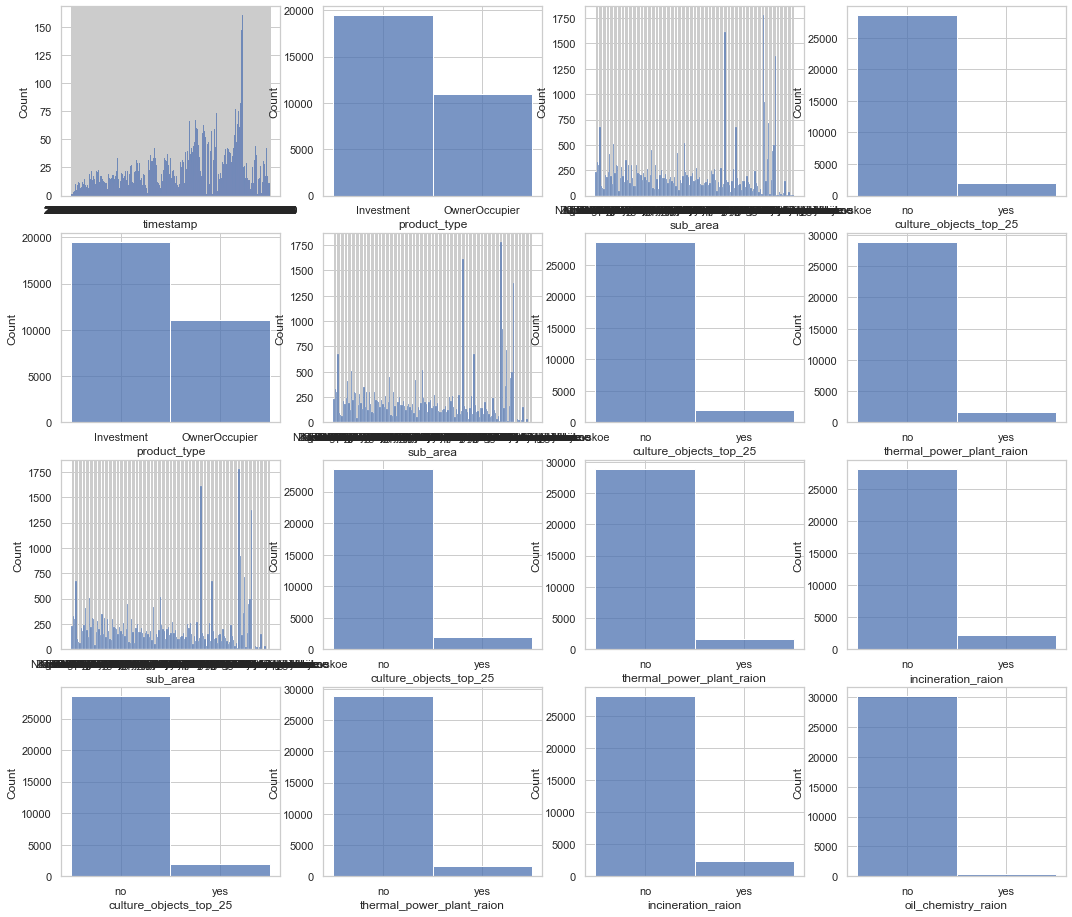

In [55]:
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
for i in range(4):    
    for j in range (4):
       sns.histplot(ax=axes[i, j], data=df, x=cat_features[i + j])

In [56]:
df[cat_features].isna().sum()

timestamp                    0
product_type                 0
sub_area                     0
culture_objects_top_25       0
thermal_power_plant_raion    0
incineration_raion           0
oil_chemistry_raion          0
radiation_raion              0
railroad_terminal_raion      0
big_market_raion             0
nuclear_reactor_raion        0
detention_facility_raion     0
water_1line                  0
big_road1_1line              0
railroad_1line               0
ecology                      0
dtype: int64

In [57]:
df['timestamp'].dtype

dtype('O')

### Применение выбраных методов обработки к датасету.

In [58]:
df.shape

(30471, 292)

In [59]:
X, y = func.process(df, 'train')

In [74]:
X.shape

(30471, 291)

In [76]:
y.shape

(30471,)

In [60]:
X.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,552,319,108,17,135,236,2,91,195,14


In [61]:
y.head()

0     5850000
1     6000000
2     5700000
3    13100000
4    16331452
Name: price_doc, dtype: int64

In [62]:
df_date = pd.read_pickle('macroeconomic.pkl')

In [63]:
df_complete = X.merge(df_date, how='left', left_on='timestamp', right_on='timestamp')

In [64]:
df_complete.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,seats_theather_rfmin_per_100000_cap,population_reg_sports_share,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0


In [65]:
df_complete.shape

(30471, 339)

In [66]:
df_complete.isna().sum()

id                                     0
timestamp                              0
full_sq                                0
life_sq                                0
floor                                  0
                                      ..
hospital_beds_available_per_cap        0
hospital_bed_occupancy_per_year        0
seats_theather_rfmin_per_100000_cap    0
population_reg_sports_share            0
apartment_fund_sqm                     0
Length: 339, dtype: int64

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(df_complete, y, test_size = 0.33, random_state = 33)

In [83]:
y_train.shape

(20415,)

In [88]:
model = catboost.CatBoostRegressor(iterations = 500,
                          depth = 5,
                          learning_rate = 1,
                          cat_features = cat_features.to_list())

In [89]:
model.fit(X_train, y_train)

0:	learn: 3400087.5985233	total: 233ms	remaining: 1m 56s
1:	learn: 3165988.8558714	total: 279ms	remaining: 1m 9s
2:	learn: 3094996.0128952	total: 323ms	remaining: 53.5s
3:	learn: 3000964.6615456	total: 373ms	remaining: 46.3s
4:	learn: 2884106.4277719	total: 418ms	remaining: 41.4s
5:	learn: 2807462.7595239	total: 471ms	remaining: 38.8s
6:	learn: 2779940.3961091	total: 519ms	remaining: 36.5s
7:	learn: 2738856.4048793	total: 568ms	remaining: 35s
8:	learn: 2698812.7870930	total: 612ms	remaining: 33.4s
9:	learn: 2662555.7174607	total: 659ms	remaining: 32.3s
10:	learn: 2627339.4829448	total: 751ms	remaining: 33.4s
11:	learn: 2604693.7681629	total: 816ms	remaining: 33.2s
12:	learn: 2555294.9097016	total: 879ms	remaining: 32.9s
13:	learn: 2529389.9806642	total: 940ms	remaining: 32.6s
14:	learn: 2503808.3476477	total: 1s	remaining: 32.5s
15:	learn: 2459513.3958334	total: 1.05s	remaining: 31.9s
16:	learn: 2421976.6785388	total: 1.1s	remaining: 31.4s
17:	learn: 2418109.6326522	total: 1.15s	remain

146:	learn: 1605785.9043518	total: 7.53s	remaining: 18.1s
147:	learn: 1605052.8785280	total: 7.58s	remaining: 18s
148:	learn: 1600654.6361429	total: 7.62s	remaining: 18s
149:	learn: 1597461.9880151	total: 7.67s	remaining: 17.9s
150:	learn: 1594072.6189982	total: 7.72s	remaining: 17.8s
151:	learn: 1589463.5154976	total: 7.77s	remaining: 17.8s
152:	learn: 1585065.0878525	total: 7.82s	remaining: 17.7s
153:	learn: 1581934.3529358	total: 7.87s	remaining: 17.7s
154:	learn: 1576969.6182496	total: 7.92s	remaining: 17.6s
155:	learn: 1573361.3640930	total: 7.97s	remaining: 17.6s
156:	learn: 1569222.0076555	total: 8.03s	remaining: 17.5s
157:	learn: 1565683.9429860	total: 8.07s	remaining: 17.5s
158:	learn: 1562232.7078113	total: 8.12s	remaining: 17.4s
159:	learn: 1557146.2822160	total: 8.16s	remaining: 17.4s
160:	learn: 1553676.9695242	total: 8.21s	remaining: 17.3s
161:	learn: 1550229.0289755	total: 8.27s	remaining: 17.3s
162:	learn: 1546579.3062086	total: 8.32s	remaining: 17.2s
163:	learn: 154403

292:	learn: 1238308.2821310	total: 14.7s	remaining: 10.4s
293:	learn: 1236899.9273672	total: 14.8s	remaining: 10.4s
294:	learn: 1236249.1901504	total: 14.8s	remaining: 10.3s
295:	learn: 1234778.6436518	total: 14.9s	remaining: 10.3s
296:	learn: 1232211.2464801	total: 14.9s	remaining: 10.2s
297:	learn: 1231086.4686235	total: 15s	remaining: 10.2s
298:	learn: 1230238.6011932	total: 15s	remaining: 10.1s
299:	learn: 1228132.4993341	total: 15.1s	remaining: 10.1s
300:	learn: 1226595.2409151	total: 15.1s	remaining: 10s
301:	learn: 1224743.1474419	total: 15.2s	remaining: 9.95s
302:	learn: 1223131.4752789	total: 15.2s	remaining: 9.9s
303:	learn: 1221207.8580917	total: 15.3s	remaining: 9.85s
304:	learn: 1219009.0270462	total: 15.3s	remaining: 9.8s
305:	learn: 1217011.5704667	total: 15.4s	remaining: 9.74s
306:	learn: 1215539.0088400	total: 15.4s	remaining: 9.69s
307:	learn: 1212979.9468953	total: 15.5s	remaining: 9.64s
308:	learn: 1211305.2617508	total: 15.5s	remaining: 9.59s
309:	learn: 1209559.27

436:	learn: 1027092.7238757	total: 21.9s	remaining: 3.15s
437:	learn: 1025597.3454887	total: 21.9s	remaining: 3.1s
438:	learn: 1025556.9179448	total: 22s	remaining: 3.05s
439:	learn: 1024270.4267455	total: 22s	remaining: 3s
440:	learn: 1022586.8957054	total: 22.1s	remaining: 2.95s
441:	learn: 1021040.0306208	total: 22.1s	remaining: 2.9s
442:	learn: 1019265.7432932	total: 22.2s	remaining: 2.85s
443:	learn: 1018155.1929058	total: 22.2s	remaining: 2.8s
444:	learn: 1017223.1577977	total: 22.3s	remaining: 2.75s
445:	learn: 1016563.6656506	total: 22.3s	remaining: 2.7s
446:	learn: 1015496.7824147	total: 22.4s	remaining: 2.65s
447:	learn: 1014661.6500029	total: 22.4s	remaining: 2.6s
448:	learn: 1012746.8209407	total: 22.5s	remaining: 2.55s
449:	learn: 1011977.1257314	total: 22.5s	remaining: 2.5s
450:	learn: 1010353.1870028	total: 22.6s	remaining: 2.45s
451:	learn: 1008754.0081931	total: 22.6s	remaining: 2.4s
452:	learn: 1008178.3455529	total: 22.7s	remaining: 2.35s
453:	learn: 1007134.1681387	

In [97]:
len(model.feature_importances_)

339

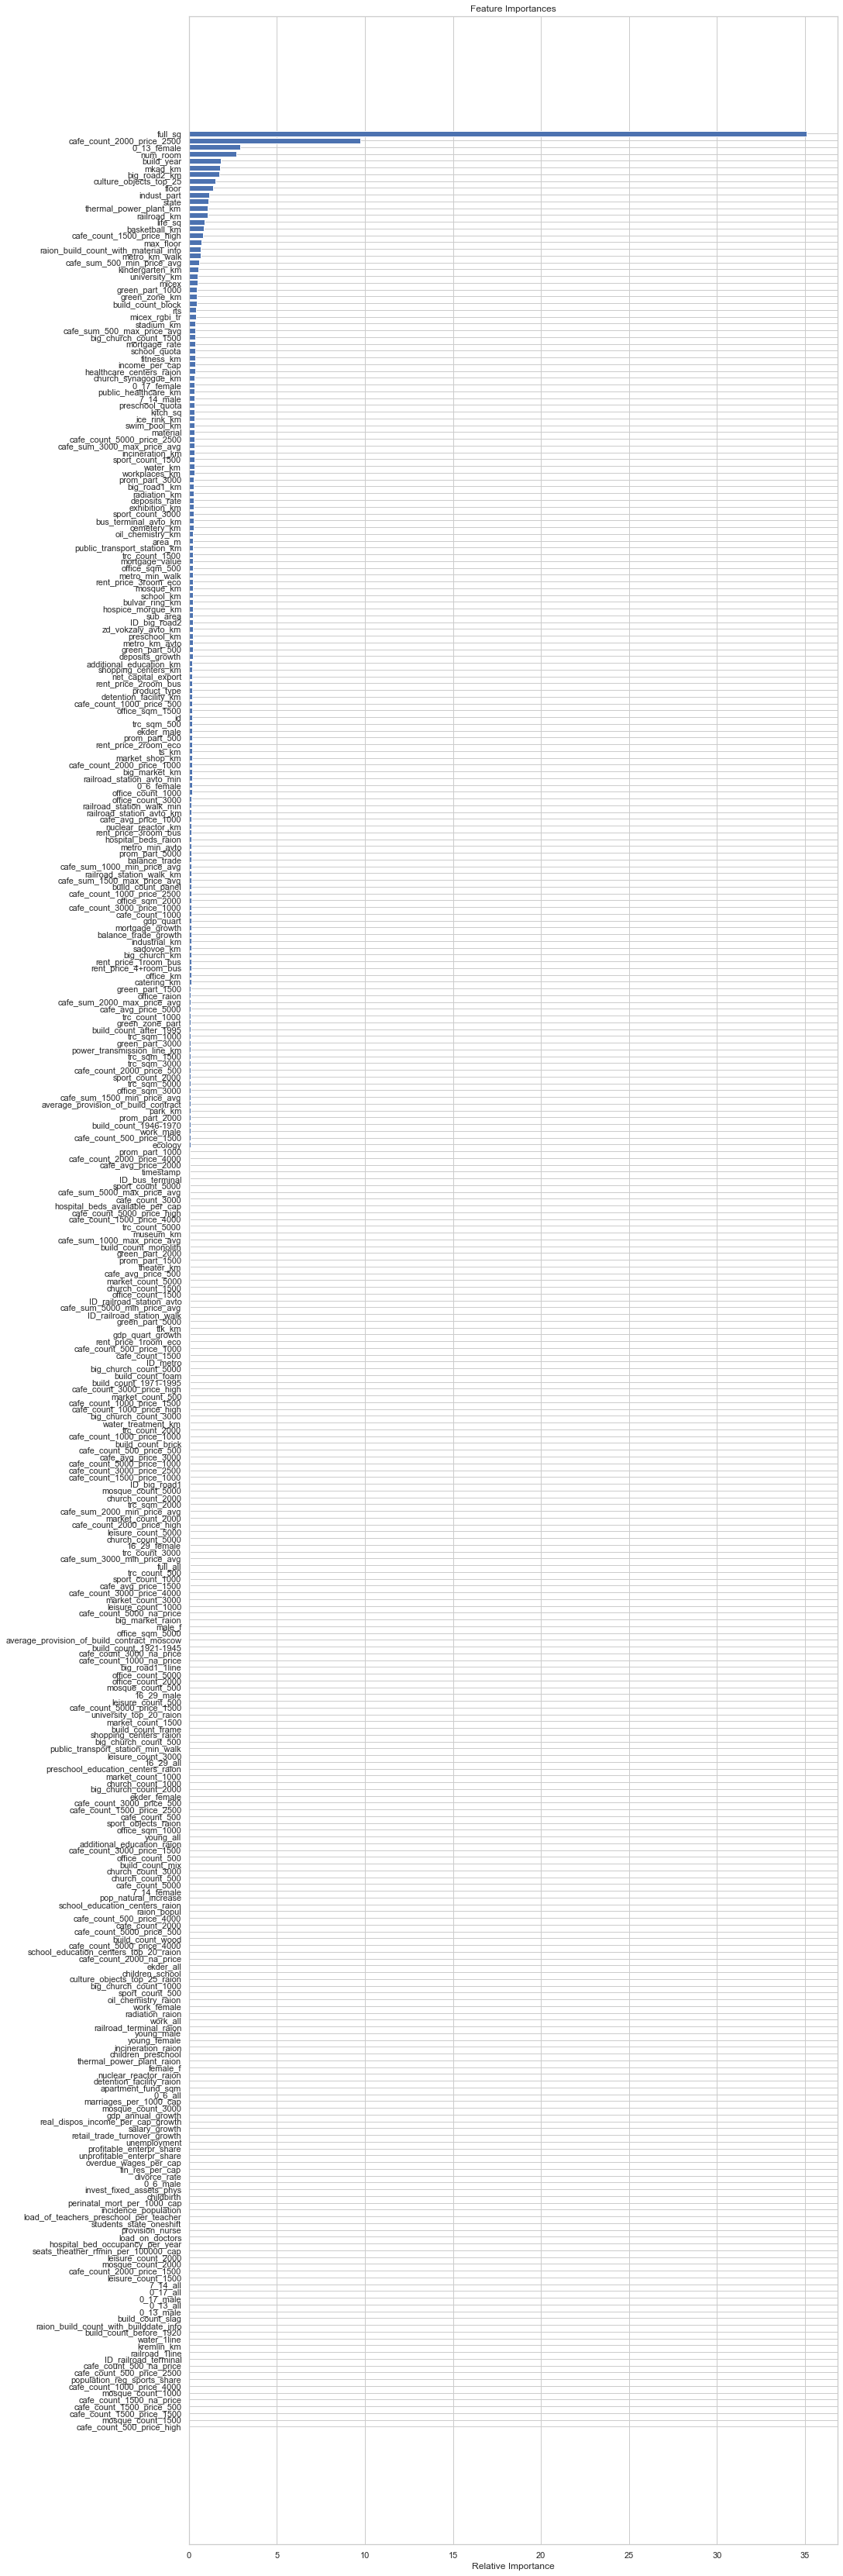

In [103]:

features= X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [104]:
importances

array([1.92801392e-01, 7.31535811e-02, 3.50955936e+01, 8.70800146e-01,
       1.39415518e+00, 7.34109379e-01, 3.04277516e-01, 1.79440036e+00,
       2.70721280e+00, 3.14022441e-01, 1.11618268e+00, 1.96576532e-01,
       2.22276157e-01, 2.39419777e-01, 4.20124933e-03, 1.04368942e-01,
       1.14362542e+00, 0.00000000e+00, 3.19270027e-01, 1.09579018e-02,
       1.06979084e-03, 3.67190092e-01, 4.21818178e-03, 1.65689337e-03,
       1.58014658e-01, 3.56950073e-01, 1.74442871e-02, 8.07094794e-03,
       6.85119686e-03, 1.49290178e+00, 4.99439698e-04, 1.56569785e-02,
       1.14992994e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.75075210e-02, 0.00000000e+00,
       0.00000000e+00, 3.05557182e-02, 2.68182421e-02, 0.00000000e+00,
       7.57131853e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.08897081e-02, 0.00000000e+00, 1.16460933e-03, 1.90830596e-01,
       8.73059489e-03, 0.00000000e+00, 0.00000000e+00, 1.67602179e-01,
      

In [105]:
file_name = 'preliminary_trained_model.pkl'

In [109]:
pickle.dump(model, open(file_name, 'wb'))